In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from dolo import *
from dolo.algos.egm import egm

# Simple path setup that works for both notebook and script
examples_dir = Path(__file__).parent.parent if "__file__" in globals() else Path.cwd().parent
model = yaml_import(str(examples_dir / "models" / "consumption_savings_iid.yaml"))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
model = yaml_import("../models/consumption_savings_iid_egm.yaml")

In [3]:
import numpy as np
sol = egm(model, a_grid=np.linspace(0.1, 10, 10) ** 2, verbose=True)

--------------------
| N   |  Error     |
--------------------
(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
|   0 |  1.000e+00 |
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
|   1 |  1.000e+00 |
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
|   2 |  9.584e-03 |
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
|   3 |  9.634e-03 |
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
|   4 |  9.685e-03 |
(5, 0, 0)
(5, 0, 1)
(5, 0, 2)
(5, 0, 3)
(5, 0, 4)
|   5 |  9.736e-03 |
(6, 0, 0)
(6, 0, 1)
(6, 0, 2)
(6, 0, 3)
(6, 0, 4)
|   6 |  9.787e-03 |
(7, 0, 0)
(7, 0, 1)
(7, 0, 2)
(7, 0, 3)
(7, 0, 4)
|   7 |  9.839e-03 |
(8, 0, 0)
(8, 0, 1)
(8, 0, 2)
(8, 0, 3)
(8, 0, 4)
|   8 |  9.891e-03 |
(9, 0, 0)
(9, 0, 1)
(9, 0, 2)
(9, 0, 3)
(9, 0, 4)
|   9 |  9.943e-03 |
(10, 0, 0)
(10, 0, 1)
(10, 0, 2)
(10, 0, 3)
(10, 0, 4)
|  10 |  9.995e-03 |
(11, 0, 0)
(11, 0, 1)
(11, 0, 2)
(11, 0, 3)
(11, 0, 4)
|  11 |  1.005e-02 |
(12, 0, 0)
(12, 0, 1)
(12, 0, 2)
(12, 0, 3)
(12, 0, 4)
|  12 |  1.010e-02 |

One can also try the faster version

## Stochastic Simulations

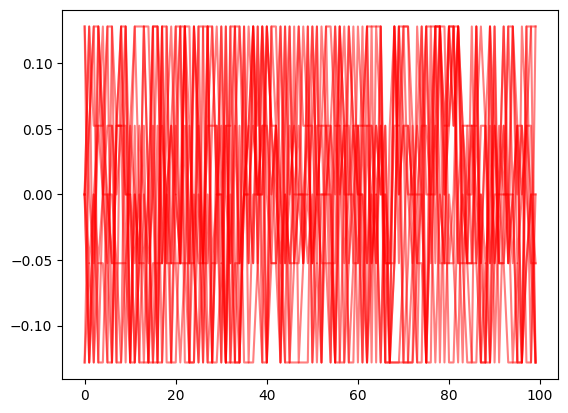

In [4]:
# Shocks are discretized as a markov chain by default:

# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)


In [5]:
dr = sol.dr  # Extract decision rule from EGMResult object
sim = simulate(model, dr, i0=1, N=100)

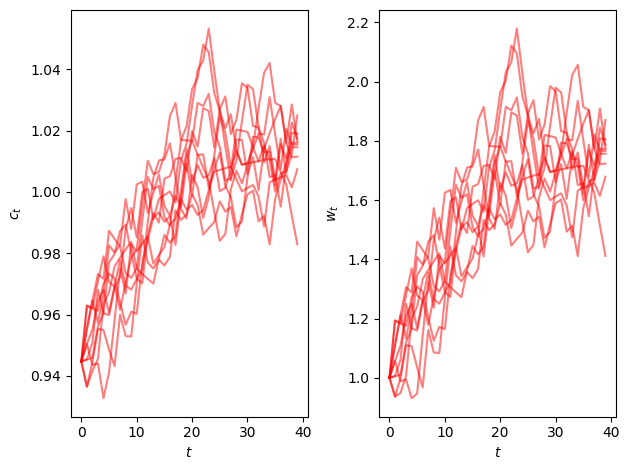

In [6]:

plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [7]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, '$w$')

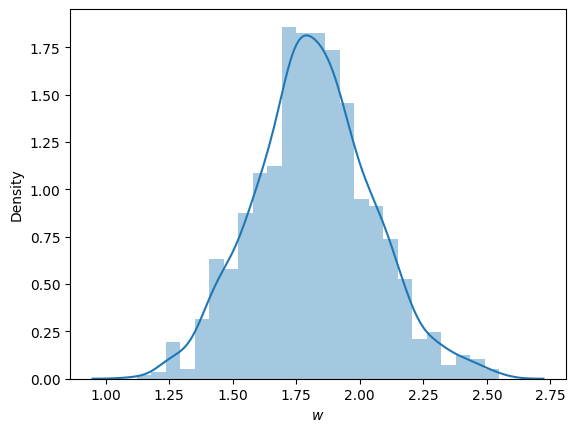

In [8]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [9]:
tab = tabulate(model, dr,'w')

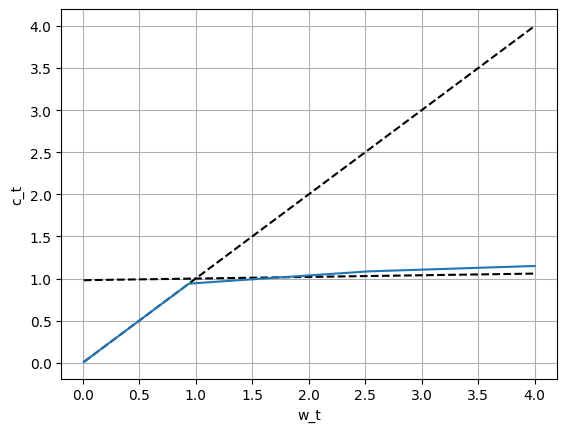

In [10]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()